## Create Simulation Cell for the InSe Paper

In [1]:
import os
import abtem
import ase.io
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.build import surface
from abtem.atoms import pretty_print_transform

from FunctionPackageOM import User_Functions, Ollis_Functions
from FunctionPackageOM.Plot_Style import Plot_Style_OM_activate


# Load custom plot style
Plot_Style_OM_activate(white_bkg_for_visualization=True)

# Note: This line is specific to Jupyter Notebooks
# Uncomment if running in Jupyter
get_ipython().run_line_magic('matplotlib', 'ipympl')



In [2]:
## import the CIF files

fpCIF = '//masc_shared/ag_volz/Oliver_Maßmeyer/CIF_Files'
fnInSe = 'InSe_mp-20485_symmetrized_beta-2H.cif'
fnAl2O3 = 'Al2O3.cif'

InSeAtoms = ase.io.read(os.path.join(fpCIF,fnInSe))
Al2O3Atoms = ase.io.read(os.path.join(fpCIF,fnAl2O3))

Text(0.5, 0.98, 'sapphire_cell')

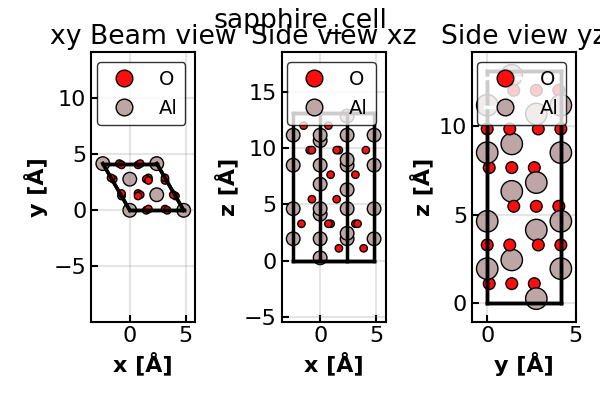

In [3]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3Atoms, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3Atoms, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3Atoms, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell')

Text(0.5, 0.98, 'InSe_cell')

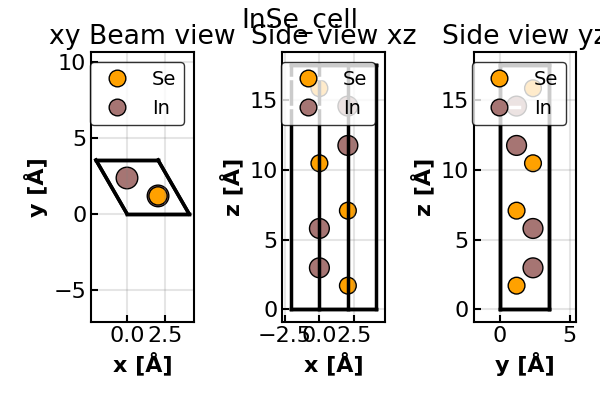

In [4]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeAtoms, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeAtoms, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeAtoms, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_cell')

In [7]:
InSePaperCLatticeConstant = 16.93 ### beta phase


InSePaperCLatticeConstant/InSeAtoms.cell[2,2]

0.9646496637999346

In [13]:
InSeLatticeConstantChen/2*3

25.395

In [39]:
InSeLatticeConstantRushchanskii/3*2

16.630666666666666

In [40]:
InSeLatticeConstantRushchanskii/3

8.315333333333333

In [5]:
## scale lattice constants to experimental values of DOI: 10.1039/C5NR00400D (Communication) Nanoscale, 2015, 7, 5981-5986 A high performance graphene/few-layer InSe photo-detector†
##Zhesheng Chen ab, Johan Biscaras a and Abhay Shukla ORCID logo*a
InSeLatticeConstantChen = 16.93 ## beta phase
##The Influence of Hydrostatic Pressure on the Static and Dynamic Properties of an InSe Crystal: A First-Principles Study
##January 2004 Physics of the Solid State 46(1):179-187 DOI: 10.1134/1.1641949 Konstantin Z. Rushchanskii


InSeLatticeConstantRushchanskii = 24.946 ## gamma phase

InSeLatticeConstantRushchanskiiScaled = InSeLatticeConstantRushchanskii/3*2

InSeLatticeConstantFromMeasurementData = 7.83*2

scaleFactor = InSeLatticeConstantFromMeasurementData/InSeAtoms.cell[2,2]
InSeAtoms.set_cell(InSeAtoms.get_cell()*scaleFactor, scale_atoms=True)

In [6]:
InSeAtoms.cell

Cell([[3.6437618072919427, 0.0, 0.0], [-1.8218809036459707, 3.1555902904543207, 0.0], [0.0, 0.0, 15.66]])

Text(0.5, 0.98, 'sapphire_cell_01-10')

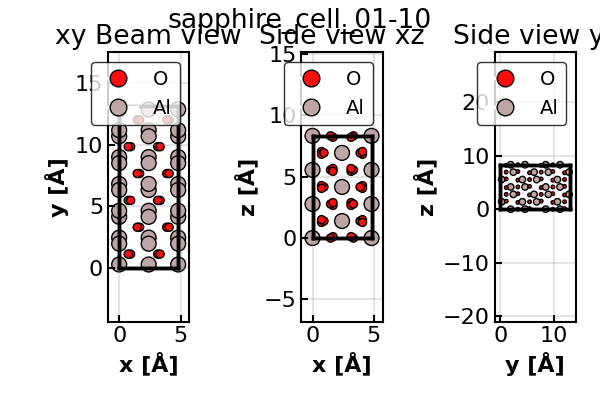

In [7]:
#change to the correct zone axis
Al2O3_01_10 = ase.build.surface(Al2O3Atoms, indices=(1, 0, 0), layers=2, periodic=True)
Al2O3_01_10.translate((0, Al2O3_01_10.cell.lengths()[1] / 2, 0))
Al2O3_01_10.wrap()

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell_01-10')


Text(0.5, 0.98, 'InSe_[10-10]')

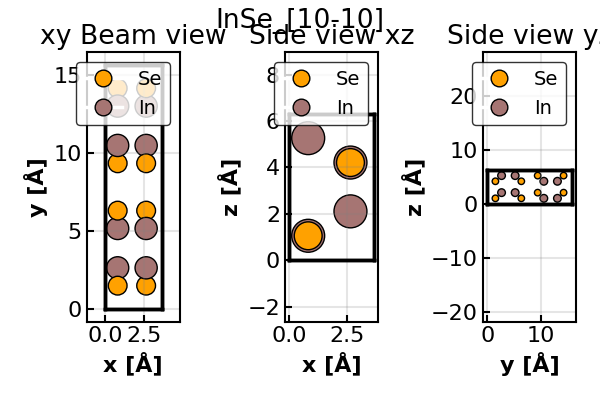

In [8]:
#change to the correct zone axis
InSe_cell_10_10 = ase.build.surface(InSeAtoms, indices=(1, 0, 0), layers=2, periodic=True)
InSe_cell_10_10.translate((-1, InSe_cell_10_10.cell.lengths()[1] / 2, 0))
InSe_cell_10_10.wrap()

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSe_cell_10_10, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSe_cell_10_10, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSe_cell_10_10, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_[10-10]')

In [9]:
#close to 4/5 ratio --> use for x,z --> fixed to 4/4 match STEM image
x_stretch_factor = Al2O3_01_10.cell.lengths()[0]/InSe_cell_10_10.cell.lengths()[0]
print(x_stretch_factor)

#closest 2.5 --> 5/2 ratio --> fixed to 6/2 to have same strain in other direction - other idea elongation for compensation
z_stretch_factor = Al2O3_01_10.cell.lengths()[2]/InSe_cell_10_10.cell.lengths()[2]
print(z_stretch_factor)

1.3186995951228533
1.318699595122853


In [10]:
6*x_stretch_factor

7.91219757073712

Text(0.5, 0.98, 'InSe_cell_10_10Repeated')

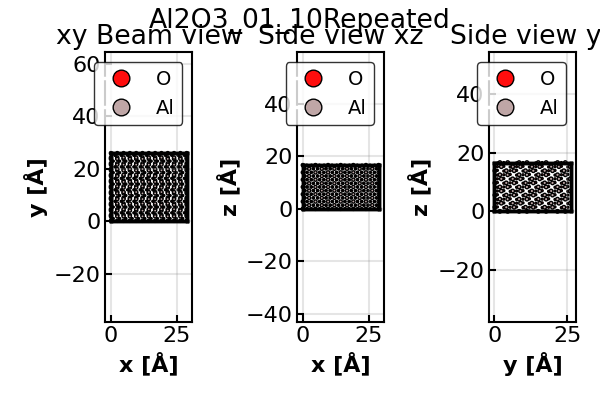

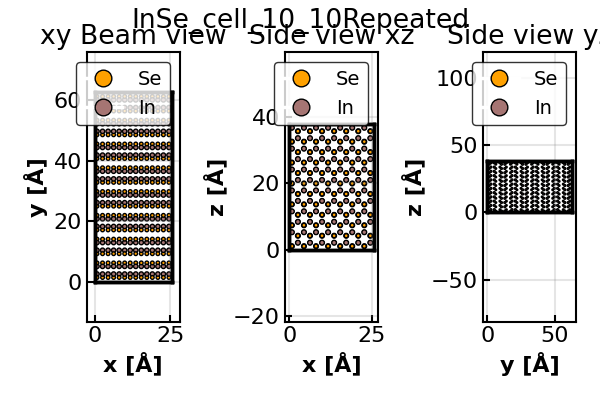

In [11]:
#repeat the cell as much as needed
Al2O3_01_10Repeated = Al2O3_01_10*(6,2,2) # 6 times 
InSe_cell_10_10Repeated = InSe_cell_10_10*(7,4,6) # 7 times to reduce strain to accaptable range 

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated')

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSe_cell_10_10Repeated, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSe_cell_10_10Repeated, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSe_cell_10_10Repeated, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_cell_10_10Repeated')


In [12]:
## replace top layers of Sapphire
Al2O3_01_10Repeated_ReplacedIn = Al2O3_01_10Repeated.copy()

#mask all Al atoms
mask_Al = Al2O3_01_10Repeated_ReplacedIn.numbers == 13

#select atoms near surface
mask_Al_surface = Al2O3_01_10Repeated_ReplacedIn.positions[:, 1] > Al2O3_01_10Repeated_ReplacedIn.cell[1, 1] / 1.25

#combine masks

mask_Al_combined = mask_Al*mask_Al_surface

## replace
Al2O3_01_10Repeated_ReplacedIn.numbers[mask_Al_combined] = 49


## replace oxgen with Se

#mask all Al atoms
mask_O = Al2O3_01_10Repeated_ReplacedIn.numbers == 8

#select atoms near surface
mask_O_surface = Al2O3_01_10Repeated_ReplacedIn.positions[:, 1] > Al2O3_01_10Repeated_ReplacedIn.cell[1, 1] / 1.25

#combine masks

mask_O_combined = mask_O*mask_O_surface

## replace
Al2O3_01_10Repeated_ReplacedIn.numbers[mask_O_combined] = 34



Text(0.5, 0.98, 'Al2O3_01_10Repeated_ReplacedIn')

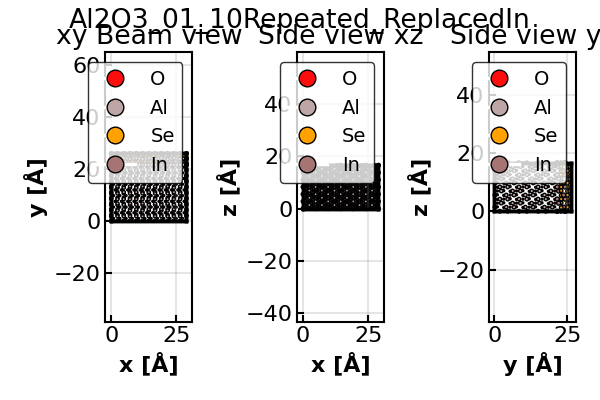

In [13]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedIn, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedIn, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedIn, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated_ReplacedIn')

Text(0.5, 0.98, 'Al2O3_01_10Repeated_ReplacedIn')

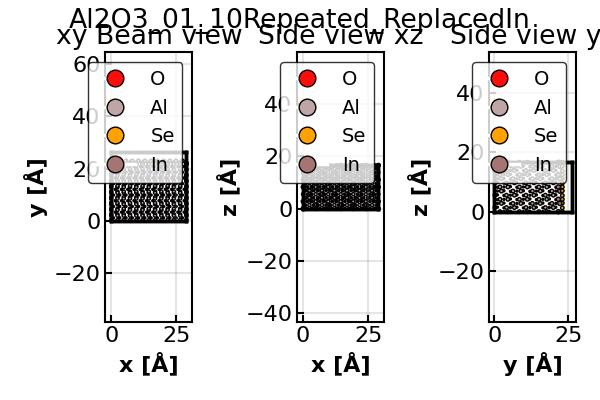

In [14]:
## cut and add InSe ontop
Al2O3_01_10Repeated_ReplacedInCutted = Al2O3_01_10Repeated_ReplacedIn.copy()

mask = Al2O3_01_10Repeated_ReplacedInCutted.positions[:, 1] > 23.5
# # deletion *requires* providing the indices, i.e. boolean indexing does not work
del Al2O3_01_10Repeated_ReplacedInCutted[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCutted, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCutted, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCutted, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated_ReplacedIn')

Text(0.5, 0.98, 'Al2O3_01_10Repeated_ReplacedInCuttedRefined')

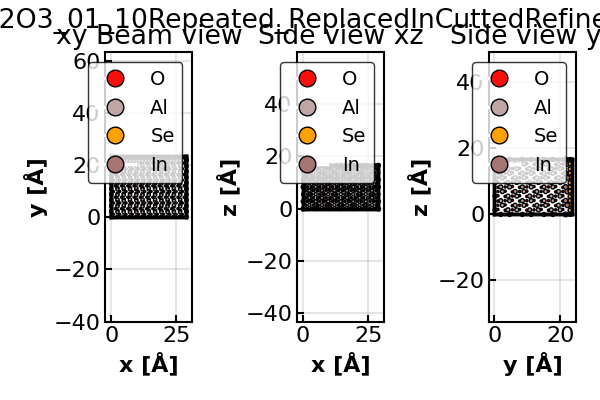

In [15]:
## optimize cell boundary to include the Van der Waals Gap properly

Al2O3_01_10Repeated_ReplacedInCuttedRefined = Al2O3_01_10Repeated_ReplacedInCutted.copy()

InSeVdWGap = 4.13557


x = Al2O3_01_10Repeated_ReplacedInCuttedRefined.cell[0][0]
y = Al2O3_01_10Repeated_ReplacedInCuttedRefined.positions.max(axis=0)[1] + InSeVdWGap/7 #limit to max Al position and add half InSe VdW Gap
z = Al2O3_01_10Repeated_ReplacedInCuttedRefined.cell[2][2]


Al2O3_01_10Repeated_ReplacedInCuttedRefined.set_cell([x,y,z])



#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCuttedRefined, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCuttedRefined, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCuttedRefined, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated_ReplacedInCuttedRefined')


Text(0.5, 0.98, 'InSe_on_sapphire')

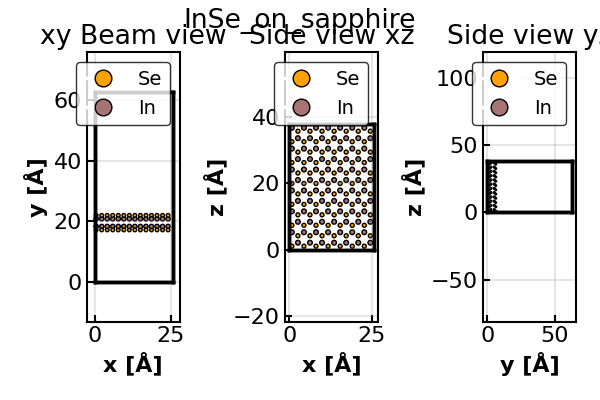

In [16]:
## modify InSe layer --> shift each layer by 1/3 of the In-In Distance

distanceInIn = 4.08362/2 #in Ang

InSe_cell_10_10RepeatedandTranslated = InSe_cell_10_10Repeated.copy()

#layer 1
maskLayer1 = (0 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 9)
InSeLayer1 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer1)[0]]
# InSeLayer1.translate([1, 0 ,0])


#layer 2
maskLayer2 = (9 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 16)
InSeLayer2 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer2)[0]]
InSeLayer2.translate([distanceInIn/3, 0 ,0])

#layer 3
maskLayer3 = (16 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 23)
InSeLayer3 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer3)[0]]
InSeLayer3.translate([2*distanceInIn/3, 0 ,0])

#layer 4
maskLayer4 = (23 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 30)
InSeLayer4 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer4)[0]]
# InSeLayer3.translate([1, 0 ,0])

# InSe_cell_10_10RepeatedandTranslated.translate([.5, 0 ,0])


#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeLayer3, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeLayer1, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeLayer1, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_on_sapphire')



Text(0.5, 0.98, 'InSeWithStacking')

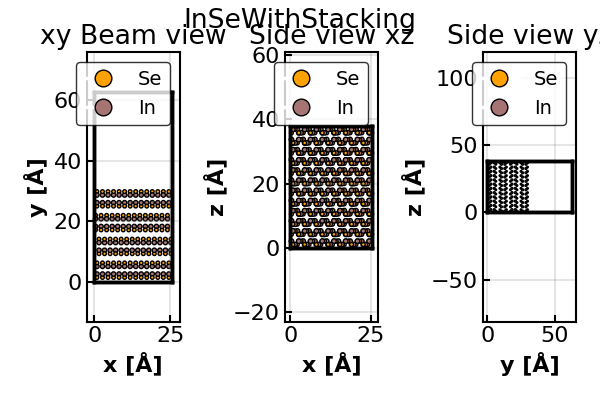

In [17]:
## stack InSe 
InSeWithStacking = InSeLayer1+InSeLayer2+InSeLayer3+InSeLayer4

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeWithStacking, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSeWithStacking')


Text(0.5, 0.98, 'InSeWithStacking')

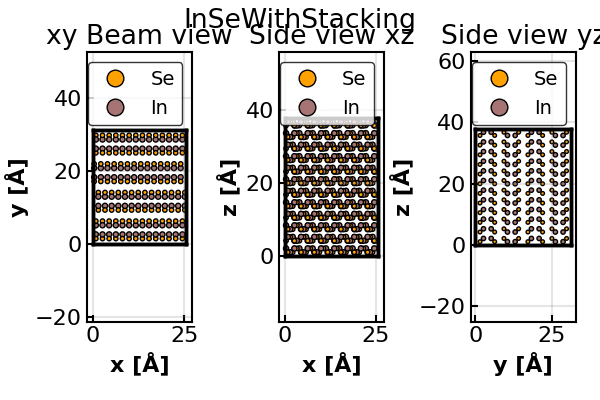

In [18]:
## reduce cell size

x = InSeWithStacking.cell[0][0]
y = InSe_cell_10_10.cell[1][1]*2 #twice as large as original
z = InSeWithStacking.cell[2][2]


InSeWithStacking.set_cell([x,y,z])

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeWithStacking, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSeWithStacking')


In [19]:
plt.close('all')

[ 27.16824799  54.8642389  963.77799715]


Text(0.5, 0.98, 'InSe_on_sapphire')

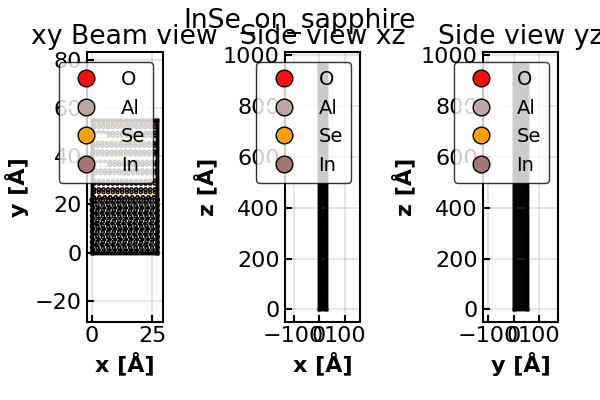

In [23]:
## Stack InSe ontop


########## heterostructure
InSe_on_sapphire = ase.build.stack(Al2O3_01_10Repeated_ReplacedInCuttedRefined,InSeWithStacking, axis = 1, maxstrain=100)

#make thick in z direction
InSe_on_sapphire = InSe_on_sapphire*(1,1,35) ## make about 100 nm thick

#add vacuum on top and bottom

InSe_on_sapphire.center(axis=2, vacuum=5)

# add vacuum on in y direction
# InSe_on_sapphire.center(axis=1, vacuum=5)

## verify the cell thickness
print(InSe_on_sapphire.cell.lengths())

## plot the cell

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSe_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSe_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSe_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_on_sapphire')


In [21]:
## save modified sapphire cell to CIF
fsf = 'ModifiedCIFs'
InSe_on_sapphire.write(os.path.join(fpCIF,fsf, 'InSeOnSapphireSimulationCell100nm_withInSe_Interface_ModifiedLatticeConstantMeasurement.cif'))
InSe_on_sapphire.write(os.path.join(fpCIF,fsf, 'InSeOnSapphireSimulationCell100nm_withInSe_Interface_ModifiedLatticeConstantMeasurement.xyz'))
print("Atom Structure saved")

# #convert A to nm
InSe_on_sapphire.positions = InSe_on_sapphire.positions/10
InSe_on_sapphire.cell = InSe_on_sapphire.cell/10

InSe_on_sapphire.write(os.path.join(fpCIF,fsf,'InSeOnSapphireSimulationCell100nm_withInSe_Interface_ModifiedLatticeConstantMeasurement_nm.cif'))
InSe_on_sapphire.write(os.path.join(fpCIF,fsf,'InSeOnSapphireSimulationCell100nm_withInSe_Interface_ModifiedLatticeConstantMeasurement_nm.xyz'))
print("Atom Structure saved")


/home/massmeye/.conda/envs/py4DSTEMnewVersion/lib/python3.11/site-packages/ase/io/cif.py:834: UserWarning: Occupancies present but no occupancy info for "{symbol}"
  warnings.warn(str(err))


Atom Structure saved
Atom Structure saved


In [22]:
InSe_on_sapphire.write(os.path.join(fpCIF,fsf,'InSeOnSapphireSimulationCell100nm_withInSe_Interface_ModifiedLatticeConstantMeasurement_nm.cif'))
InSe_on_sapphire.write(os.path.join(fpCIF,fsf,'InSeOnSapphireSimulationCell100nm_withInSe_Interface_ModifiedLatticeConstantMeasurement_nm.xyz'))
print("Atom Structure saved")

Atom Structure saved


In [32]:
## for vesta, only small cell --> enoug for visualization

########## heterostructure
InSe_on_sapphire = ase.build.stack(Al2O3_01_10Repeated_ReplacedInCuttedRefined,InSeWithStacking, axis = 1, maxstrain=100)


InSe_on_sapphire.write(os.path.join(fpCIF,fsf,'InSeOnSapphireSimulationCell_visualization.cif'))
InSe_on_sapphire.write(os.path.join(fpCIF,fsf,'InSeOnSapphireSimulationCell_visualization.xyz'))
print("Atom Structure saved")

Atom Structure saved


Text(0.5, 0.98, 'InSe_on_sapphire')

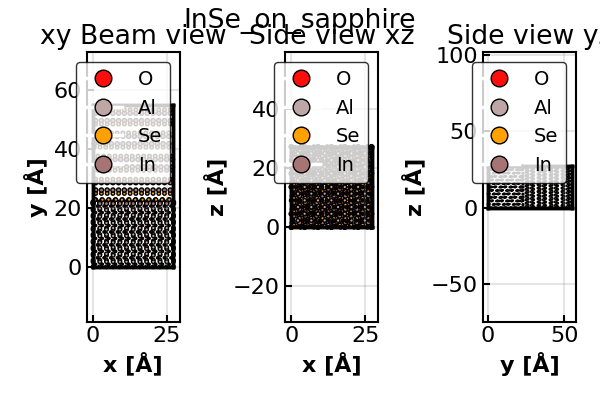

In [30]:

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSe_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSe_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSe_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_on_sapphire')

In [ ]:
InSe_on_sapphire.cell.